In [1]:
import math as m
import numpy as np
import pandas as pd
#change filename
uk = "C:\YFCC_Dataset\TP_op1M.csv"
rad="C:\YFCC_Dataset\Rad.csv"

In [2]:
df = pd.read_csv(uk)
df1=df
coord={}
df.head()
#Input file

,PhotoID,UserID,Latitude,Longitude,Accuracy
0,4684204212,22602880@N00,-122.401334,37.782166,16.0
1,5377288276,27793548@N06,-122.512321,37.780755,13.0
2,265139537,53687766@N00,-122.412157,37.809343,14.0
3,7506210980,70221037@N00,-122.458355,37.792083,16.0
4,4272303739,34415916@N07,-122.449407,37.744099,13.0


In [3]:
len(df)

2586

In [4]:
Lat=np.asarray(df['Latitude'])
Long=np.asarray(df['Longitude'])
import matplotlib.pyplot as plt

In [5]:
#creating the dataframe with coords

In [6]:
coords = df.as_matrix(columns=['Longitude',"Latitude"])

In [7]:
from sklearn.datasets import make_blobs
import hdbscan

In [8]:
pd.DataFrame(coords).head()
#viewing dataframe to be passed to hdscan

,0,1
0,37.782166,-122.401334
1,37.780755,-122.512321
2,37.809343,-122.412157
3,37.792083,-122.458355
4,37.744099,-122.449407


In [9]:
rads = np.radians(coords)
#converting to radians

In [10]:
#
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0,metric='haversine', gen_min_span_tree=True, min_cluster_size=20, min_samples=None, p=None).fit(rads)
cluster_labels = clusterer.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(-1, num_clusters)])

In [11]:
cluster_label=(clusterer.labels_)

In [12]:
noc=clusterer.labels_.max()
#noc - no of clusters
print(noc)

27


In [13]:
# clusterer.probabilities_

In [14]:
x = cluster_label
print(cluster_label)

[-1  2 20 ...  5 18 12]


In [15]:
cluster_points={}
for i in range(0,noc+1):
    cluster_points[i]=[]
    
cluster_points[-1]=[]

for i in range(0,len(x)):
    l=cluster_points[x[i]]
    l.append(coords[i])
    cluster_points[x[i]]=l
cluster_points

{-1: [array([  37.782166, -122.401334]),
  array([  37.792083, -122.458355]),
  array([  37.744099, -122.449407]),
  array([  37.795135, -122.408981]),
  array([  37.761317, -122.410946]),
  array([  37.786559, -122.455941]),
  array([  37.788102, -122.4119  ]),
  array([  37.773598, -122.44194 ]),
  array([  37.801103, -122.455469]),
  array([  37.770577, -122.404198]),
  array([  37.790277, -122.407305]),
  array([  37.806388, -122.400278]),
  array([  37.7865, -122.3946]),
  array([  37.75299, -122.4449 ]),
  array([  37.75281 , -122.411961]),
  array([  37.787333, -122.403834]),
  array([  37.779305, -122.412124]),
  array([  37.8095  , -122.370166]),
  array([  37.729   , -122.457667]),
  array([  37.781166, -122.405334]),
  array([  37.794797, -122.405359]),
  array([  37.790097, -122.427848]),
  array([  37.806472, -122.439875]),
  array([  37.754924, -122.411919]),
  array([  37.8009  , -122.426061]),
  array([  37.7562, -122.4328]),
  array([  37.787815, -122.396972]),
  array

In [16]:
# No of outliers
len(cluster_points[-1])

1203

In [17]:
import folium
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


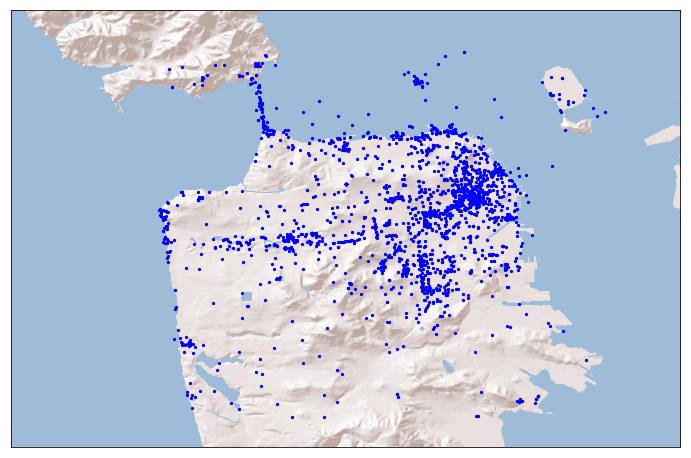

In [18]:
plt.figure(figsize = (12, 12))


m = Basemap(projection='merc', resolution='l', epsg = 4269, 
            llcrnrlon=-122.567288,llcrnrlat=37.696627, urcrnrlon=-122.329308,urcrnrlat=37.852144)

# plot the aftershock
x, y = m(coords[:, 1], coords[:, 0])
m.scatter(x,y,5,marker='o',color='b')
m.arcgisimage(service='World_Shaded_Relief', xpixels = 5000, verbose= False)
plt.show()

In [19]:
import matplotlib.cm as cmx
import matplotlib.colors as colors

# define a helper function to get the colors for different clusters
def get_cmap(N):
    '''
    Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.
    '''
    color_norm  = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='nipy_spectral') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color

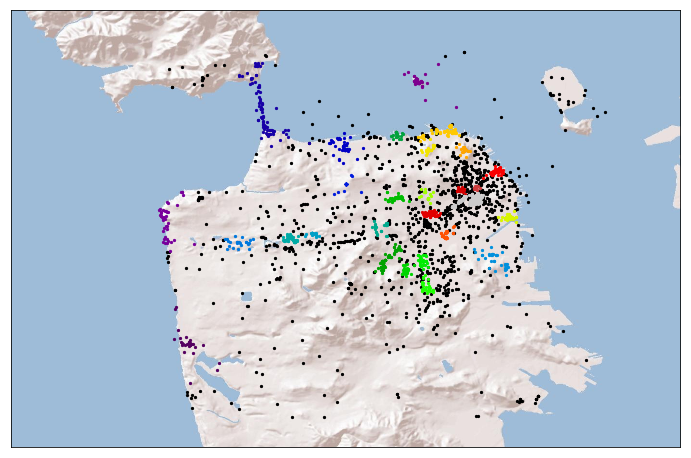

In [20]:
plt.figure(figsize = (12, 12))

m = Basemap(projection='merc', resolution='l', epsg = 4269, 
            llcrnrlon=-122.567288,llcrnrlat=37.696627, urcrnrlon=-122.329308,urcrnrlat=37.852144)

unique_label = np.unique(cluster_labels)

# get different color for different cluster
cmaps = get_cmap(num_clusters)

# plot different clusters on map, note that the black dots are 
# outliers that not belone to any cluster. 
for i, cluster in enumerate(clusters):
    lons_select = cluster[:, 1]
    lats_select = cluster[:, 0]
    x, y = m(lons_select, lats_select)
    m.scatter(x,y,5,marker='o',color=cmaps(i), zorder = 10)

m.arcgisimage(service='World_Shaded_Relief', xpixels = 5000, verbose= False)

plt.show()

In [21]:
l=list(cluster_points)
y


array([], dtype=float64)

In [22]:
# clusterer.minimum_spanning_tree_.plot()

In [23]:
# clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

In [24]:
# clusterer.condensed_tree_.plot()

In [25]:
# cluster_points={}
# for i in range(0,noc+1):
#     cluster_points[i]=[]
    
# cluster_points[-1]=[]

# for i in range(0,len(x)):
#     l=cluster_points[x[i]]
#     l.append(coords[i])
#     cluster_points[x[i]]=l
# cluster_points
cluster_exemplar_photoid={}
cluster_exemplar={}
for i in range(0,noc+1):
    cluster_exemplar[i]=[]
    cluster_exemplar_photoid[i]=[]
    
cluster_exemplar[-1]=[]
cluster_exemplar_photoid[-1]=[]

for i in range(0,noc):
    l=np.rad2deg(clusterer.exemplars_[i])
    cluster_exemplar[i]=l
    
        
    
    


    


In [26]:
for i in range(0,noc):
    print(len(cluster_exemplar[i]))

20
20
20
20
20
57
21
20
20
20
21
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


In [27]:
cluster_exemplar

{-1: [], 0: array([[  37.735402, -122.507225],
        [  37.732184, -122.501957],
        [  37.733525, -122.503566],
        [  37.734195, -122.506667],
        [  37.735799, -122.504982],
        [  37.733457, -122.503223],
        [  37.733576, -122.503759],
        [  37.733432, -122.502418],
        [  37.733655, -122.5065  ],
        [  37.733118, -122.503609],
        [  37.733118, -122.503609],
        [  37.733186, -122.503201],
        [  37.734077, -122.503749],
        [  37.734077, -122.503749],
        [  37.73305 , -122.506527],
        [  37.733355, -122.50597 ],
        [  37.733241, -122.504693],
        [  37.734781, -122.503615],
        [  37.732524, -122.503781],
        [  37.733101, -122.505455]]), 1: array([[  37.826641, -122.422778],
        [  37.827039, -122.422971],
        [  37.827   , -122.422834],
        [  37.826698, -122.422778],
        [  37.82676 , -122.423121],
        [  37.826679, -122.42292 ],
        [  37.826679, -122.42292 ],
        [  37